# LTS Curve Fit

In [94]:
import numpy as np
from scipy.optimize import least_squares
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [8, 5]
plt.rcParams['figure.dpi'] = 100

In [95]:
data = np.genfromtxt('C:/Users/zumst/git/LTS/LTS_SaschaZumstein_Test/LTS_CurveDataV1.csv', delimiter=';', skip_header=1)
z_mess = data[:,0] # distance
cog_mess = data[:,1] # center of Gravit

In [96]:
def objective_function(x, cog, z):
    a, b, c, d, e, f, g, h, i, j ,k = x
    z_est = (a*cog**10+b*cog**9+c*cog**8+d*cog**7+e*cog**6+f*cog**5+g*cog**4+h*cog**3+i*cog**2+j*cog+k)
    return z_est - z

In [97]:
x0 = [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
result = least_squares(objective_function, x0, args=(cog_mess, z_mess))
print(result.x)

[-3.11767119e-25  1.49183346e-21 -3.02357839e-18  3.39036248e-15
 -2.30213278e-12  9.74279304e-10 -2.54731085e-07  3.96967745e-05
 -3.18417563e-03  3.50999221e-01  2.54416652e+02]


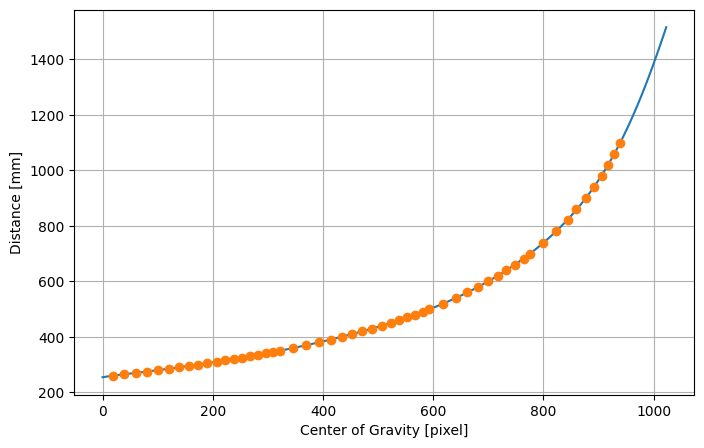

In [98]:
cog_calc = np.linspace(0, 1023, 1024)
z_calc = objective_function(result.x, cog_calc, 0)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(cog_calc, z_calc)
ax.plot(cog_mess, z_mess, 'o')
ax.set_xlabel('Center of Gravity [pixel]')
ax.set_ylabel('Distance [mm]')
ax.grid()

[-9.04997248e-02  1.08210011e-01  1.77092557e-01 -9.35426817e-02
 -9.36331465e-02 -7.92029369e-02 -1.21749817e-01  1.86842319e-04
 -3.65076071e-02  3.78390683e-02  2.25376568e-01  2.23139742e-01
  2.64127994e-02 -3.78224803e-02  4.96440543e-02 -4.86524534e-02
  1.53588307e-02 -1.26619946e-01 -1.10718028e-01 -4.17106102e-01
 -1.43140482e-01  2.57548011e-01  2.34447348e-01  1.72696931e-01
  2.49787565e-02 -2.48476066e-01 -1.07707161e-01  4.88952788e-01
  3.32379496e-01 -3.79897521e-02  1.94063103e-02 -1.71310203e-01
  8.17984900e-02 -7.49221839e-01 -4.14295371e-01 -8.84068193e-02
 -3.58100991e-02  5.05853565e-01  2.95819739e-01  2.10723090e-01
  1.31462228e-01 -6.29018571e-02  2.39034479e+00 -1.29783344e+00
 -2.88269110e+00  1.24722726e-01  2.40170807e+00 -1.86903217e+00
  3.09225755e-02  8.85277754e-01  2.74796730e+00 -1.56133896e+00
 -3.19616789e+00  1.92202572e+00]


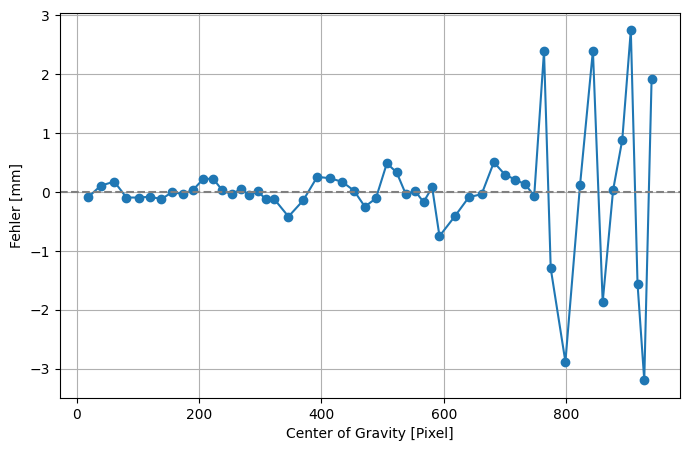

In [ ]:
residuals = objective_function(result.x, cog_mess, 0) - np.array(z_mess)

# Plot
fig, ax = plt.subplots()
ax.plot(cog_mess, residuals, 'o-')
ax.axhline(0, color='gray', linestyle='--')
ax.set_xlabel('Center of Gravity [Pixel]')
ax.set_ylabel('Fehler [mm]')
ax.grid()